# 1. Business Problem Understanding

- Develop ML model that can help the company for determining whther an applicnat is eligible for a loan or not.

- #####  Dream Housing Finance company deal in all kinds of home loans. They have presence acrsoo all urban and rural areas.Customer first applies for home loan after that company validates the customer for loan.

- ##### Company wants to automate the loan eligibilty process(real time) based on customer detail provided while filling online applicaiton form. These details are Gender, martial Status, Education , Number of Dependents, Income Loan, Amoount, Credit History and others. TO automate this process, they have procided a identify the customers segments that are eligible for loan amount so that they can specificaly target these customers.


## Data Set Description:

- There are 13 variables in this datas set
 -  8 categorical variable
 -  4 continuous variable
 -  1 varible to accommodate the loan ID.

### Data              -         Understanding

- Loan_ID: - Unique Loan ID
  
- Gender:- Male/Female  

- Married: Applicant married

- Dependents:- Number of dependents

- Education:- Applicant Education

- Self_Employed: - Whether the applicant is Self employed

- ApplicantIncome - Applicant income

- CoapplicantIncome:- Coapplicant income

- LoanAmount:- Loan Amount in thousand

- Loan_Amount_Term:- Term of loans in month

- Credit_History:- credit history  meets guidlines

- Property_Area:- Urban/Semi/Urban/Rural

- Loan_Status:- Loan approved `target varible`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\Data science NIT\SRK video lecture  DS\Notes\Project\LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## Loan_ID have the unique value so we don't take it.
## Gender have 2 category - MALE & Female and MODE is Male
## Maried have 2 category - Yes or NO and the MODE is YES
## Dependents is count variable, having the wrong data 3+ which hdave to be treted
## Education have 2 category - Graduate and non graduate 
## 

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data["Loan_ID"]

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [9]:
data["Loan_ID"].nunique() #total unique number is 614 that is non required so drop the column

614

In [10]:
data["Loan_ID"].unique() #Return the total unique value name

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [11]:
len(data["Loan_ID"].unique()) #Lenght of the uniqe value

614

#### Drop unimportant columns a per feature Selection (Filter Methods)

In [12]:
data['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [13]:
data.drop(columns=['Loan_ID'],inplace=True)

In [14]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [15]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

- In the Gender column, their is a nan - null value or we can say some missing value so, we have to replace it by using the mode.

In [16]:
data['Gender'].nunique()

2

In [17]:
data["Gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

In [18]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

- In compare to Female, Male are more so IN GENDER- MODE is male

In [19]:
data['Married'].unique()


array(['No', 'Yes', nan], dtype=object)

- Their is the some missing value in the Married, so we have to replace it with the mode. and the MODE of the married is Yes , bcoz YES is more in compare to the NO

In [20]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
# while executin with the ML we can not use the 3+, so this is the wrong data.

In [23]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [24]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

- data['Education'].unique() #Total number of uniqe category in Education that is Graduate and Not Graduate. Their is no missing value

In [25]:
data['Education'].nunique() #Total count of unique Education

2

In [26]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [27]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

- Their is some missing value, so we have to replace with the MODE of Self_Employed is NO, bcoz the NO has the higher count.

In [28]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

### Create New Columns as per requirements

- To combine ApplicantIncome + CoaaplicantIncome  data
- This columnn creation is done based on the business problem , busines we have to check the applicantincoem as well as coapplicantincome. as a combine

In [29]:
data['Income'] =data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome' , 'CoapplicantIncome'], inplace=True)

- #Why we use the describe function- bcoz the INCOME is a continuous variable. 

In [30]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

- In this dataset mean - 7024 and min = 1442 , max is like 81000 so max is outlier, But we can not do anything bcoz people can earn more income, we have to provide the loan . these are not the outliers

In [31]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [32]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [33]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

- #Now i am confuse with 1 and 0 , so i have to replace 1 is good, and 0 is bad credit_history

In [34]:
data['Credit_History']= data['Credit_History'].replace({1:'good',0:'bad'})


In [35]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [36]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [37]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [38]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [39]:
data['Property_Area'].nunique()

3

In [40]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
data['Loan_Status'].nunique()

2

In [42]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [43]:
# categorical  = data.select_dtypes(include='object').columns.to_list()

In [44]:
#categorical

In [45]:
#numerical  = data.select_dtypes(include='number').columns.to_list()

In [46]:
#numerical

In [47]:
#data.select_dtypes(include='number')

In [48]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [49]:
continous = ['Income', 'LoanAmount']

discrete_categorical = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History',
       'Property_Area', 'Loan_Status' ]

discrete_count =['Dependents','Loan_Amount_Term']

In [50]:
##Property_Area is Ordinal variable = It is totaly based on the area it is in Village or City prices differ +is more.

In [51]:
continous

['Income', 'LoanAmount']

In [52]:
discrete_categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [53]:
discrete_count

['Dependents', 'Loan_Amount_Term']

### Exploratory Data Analysis(EDA)

- For continous Variables

In [54]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


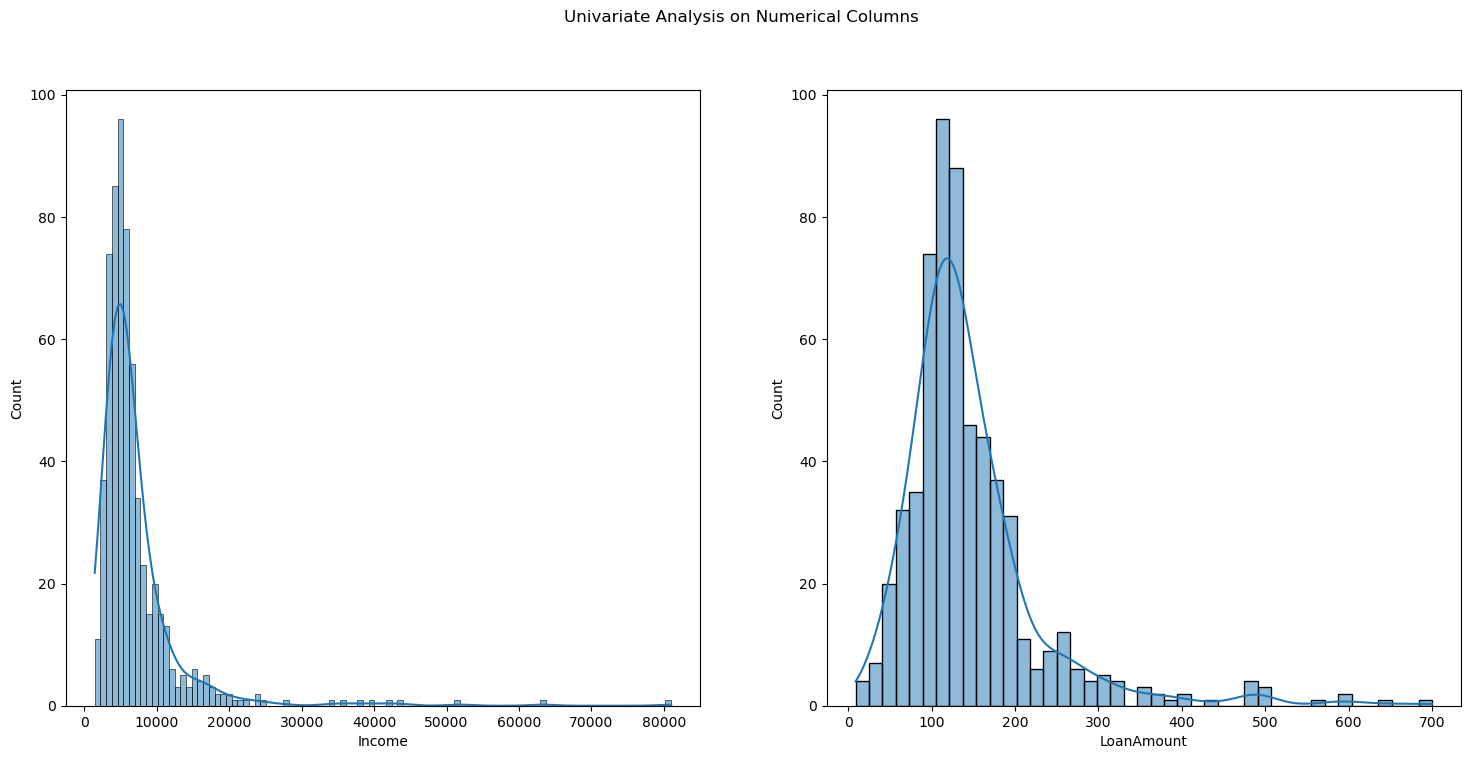

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Subplot 1
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], kde=True)  # Use sns.histplot for kde option

# Subplot 2
plt.subplot(1, 2, 2)
sns.histplot(data['LoanAmount'], kde=True)  # Fix typo True instead of Ture

# Set the overall title
plt.suptitle('Univariate Analysis on Numerical Columns')

# Show the plot
plt.show()


- both are Right skewed, and also more employe have the salary is range is less than 20k

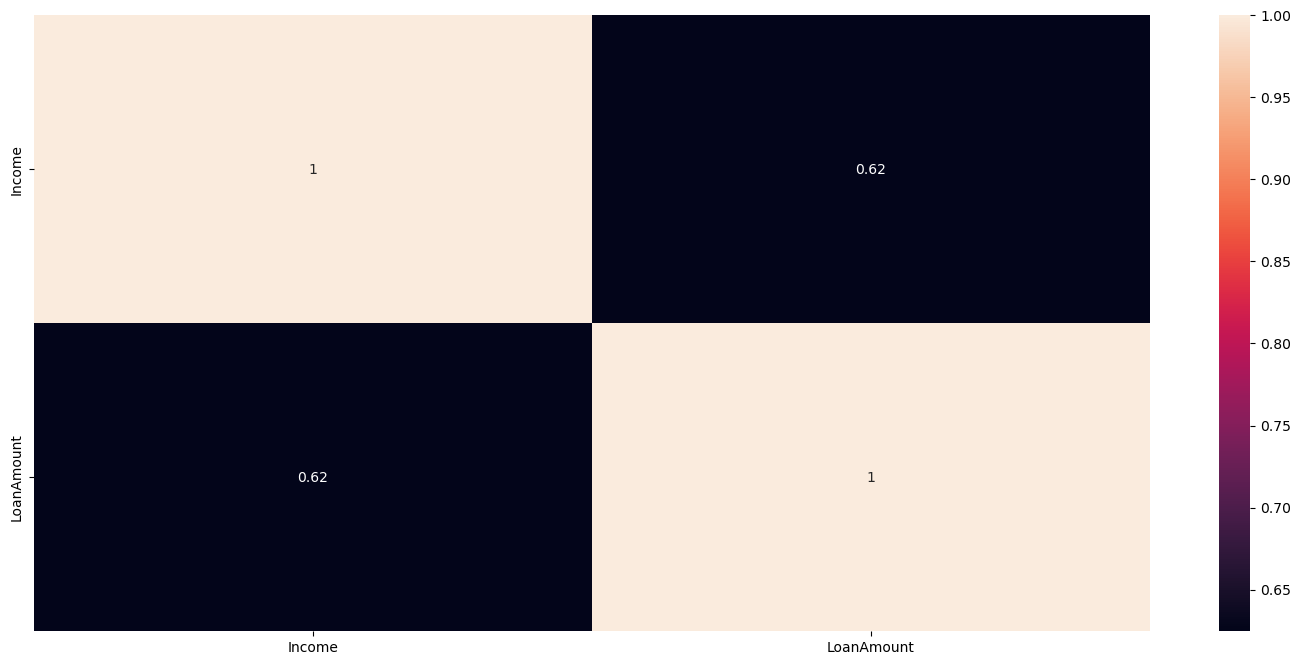

In [56]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

- #Correlation matrics for the continous variable,  .62 they are corelated to 60 % 

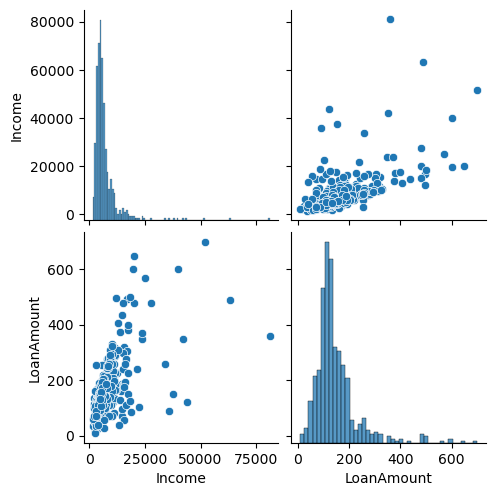

In [57]:
sns.pairplot(data[continous])
plt.show()

- They are possing the positive corelation , as the income increase the loan amount also get increases

### For Discrete Variablem

In [58]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


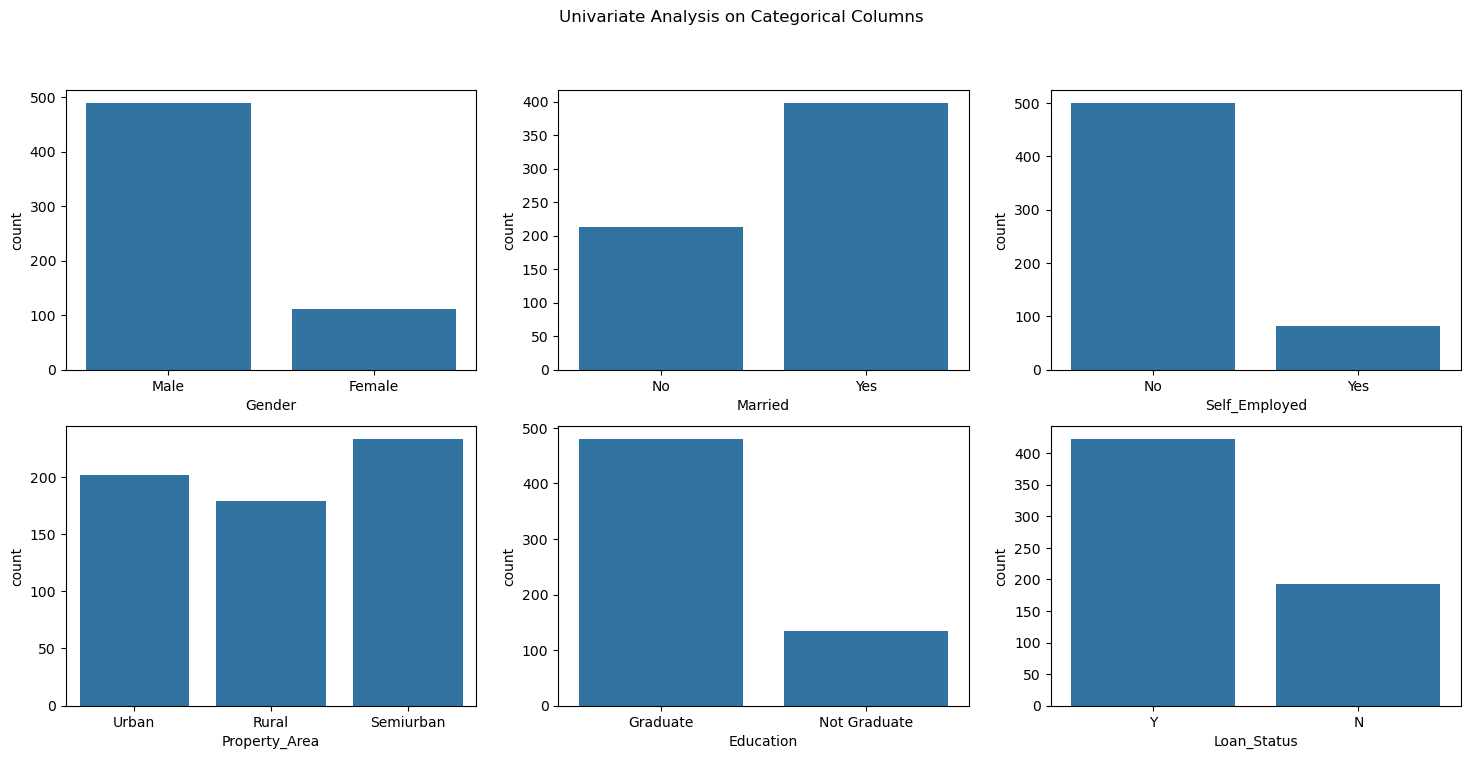

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Subplot 1
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data)

# Subplot 2
plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=data)

# Subplot 3
plt.subplot(2, 3, 3)
sns.countplot(x='Self_Employed', data=data)

# Subplot 4
plt.subplot(2, 3, 4)
sns.countplot(x='Property_Area', data=data)

# Subplot 5
plt.subplot(2, 3, 5)
sns.countplot(x='Education', data=data)

# Subplot 6
plt.subplot(2, 3, 6)
sns.countplot(x='Loan_Status', data=data) 

# Set the overall title
plt.suptitle('Univariate Analysis on Categorical Columns')

# Show the plot
plt.show()


In [60]:
# Let's compare all the categories with respect to the Loan Status to understand the overall impact

print("Impact of Marriage on Loan Status")
print(pd.crosstab(data["Loan_Status"], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Education"]))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data["Loan_Status"], data["Self_Employed"]))
print('\n')
  
print("Impact of Property on Loan Status")
print(pd.crosstab(data["Loan_Status"], data['Property_Area']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data["Loan_Status"], data['Credit_History']))
print('\n')


Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


Impact of Property on Loan Status
Credit_History  bad  good
Loan_Status              
N                82    97
Y                 7   378




### Check the missing values

In [61]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

- lots of missing values are present in the dataset

### Check for the Skewness

In [62]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

- Income and LoanAmount have the skewness

### Check Outliers

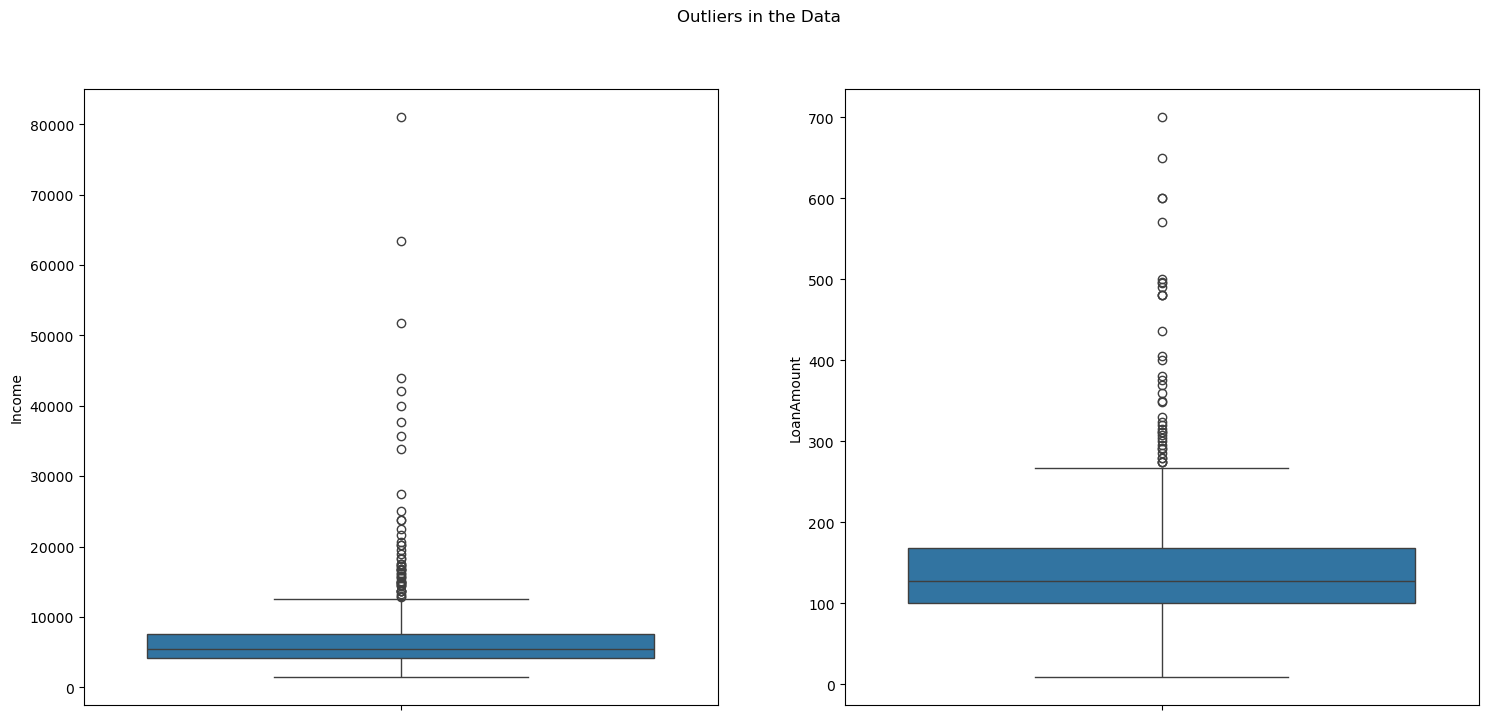

In [63]:
# Let's visuaize the outliers using the Box Plot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

- Both are having the outlier ,Outliers should be retrained (bcoz really some people have hogh income)

# Stage-3: Data Preparation   

1. Data Cleaning
- Wrong data
- Wrong data type
- Missing values
- outliers
2. Data Wrangling
  - Transformation (applicable on continous)
  - Scalling
  - encoding
 
- Don't apply any data wrangling on the count variable

#### wrong Data treatment

In [64]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

In [65]:
data['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

- In this Dependents valeu there are 3 string data type.

#### Missig Values Treatment

- How to extract the data of missing value.

In [66]:
data[data['Gender'].isnull()] #Whenever those record have the missing value of the gender.

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
23,NaN,Yes,2,Not Graduate,No,112.0,360.0,bad,Rural,N,5282.0
126,NaN,Yes,3,Graduate,No,370.0,360.0,good,Rural,Y,23803.0
171,NaN,Yes,3,Graduate,No,700.0,300.0,good,Urban,Y,51763.0
188,NaN,Yes,0,Graduate,Yes,168.0,360.0,good,Rural,Y,5970.0
314,NaN,Yes,0,Graduate,No,159.0,360.0,good,Rural,N,4316.0
334,NaN,Yes,1,Graduate,Yes,182.0,180.0,good,Urban,Y,11666.0
460,NaN,Yes,0,Graduate,Yes,160.0,360.0,NaN,Semiurban,Y,6166.0
467,NaN,Yes,0,Graduate,No,110.0,360.0,good,Semiurban,Y,16692.0
477,NaN,Yes,2,Graduate,No,132.0,360.0,bad,Semiurban,N,4745.0
507,NaN,No,0,Graduate,No,96.0,360.0,good,Urban,N,3583.0


In [67]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

- Gender, Married, Self_Employed thee 3 are categorical so we are replacing with the Modem

- Income , LoanAmount, Loan_Amount_Term, Credit_History  in these we can not fill the Mode - bcoz we can not fill the income withou having the income, so we will drop these column.

- we can use both the fillna() from the pandas 
- we can use sklearn.iputer `imoport simpleipmputer

In [68]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

- So here all the missing data is treated

### Data type conversion

In [69]:
data['Dependents']  = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

In [70]:
data.duplicated().sum()

0

##### outliers Treatment

- Outliers should be retrained(bcoz really some people will have high income, they are not the outliers they earn by themself)

### Encoding 

- We can do the encoding with the diffrent fuction using 
- replace()
- map()
- dummies(),drop first =True
- one hot encoding(), drop first = True

Certainly! Below is the code to apply all the encoding methods (`replace()`, `map()`, `get_dummies()` with `drop_first=True`, and `OneHotEncoder` with `drop='first'`):

### 1. Using `replace()` Method (your current approach)

```python
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Credit_History'] = data['Credit_History'].replace({'good': 1, 'bad': 0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12
```

### 2. Using `map()` Method

```python
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Credit_History'] = data['Credit_History'].map({'good': 1, 'bad': 0})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12
```

### 3. Using `get_dummies()` with `drop_first=True`

```python
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], drop_first=True)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12
```

### 4. Using `OneHotEncoder` with `drop='first'`

```python
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

# Initialize OneHotEncoder with drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_cols])

# Convert the encoded data to a DataFrame with column names from OneHotEncoder
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the new encoded columns
data = data.drop(categorical_cols, axis=1).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12
```

This covers each of the methods you mentioned for encoding categorical data. Let me know if you need further explanation on any of these approaches!

In [71]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female':0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].replace({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban':1, 'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1, 'bad':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1,'N':0})



In [72]:
### Ordinal encoding will be done in the Property_Area , 1st Rural then Semiurban  then Urban

In [73]:
data['Loan_Amount_Term'].head()

1    360
2    360
3    360
4    360
5    360
Name: Loan_Amount_Term, dtype: int32

### Transformation

In short, **Box-Cox** is a transformation technique in **`scipy.stats`** used to make non-normal data more normally distributed. It helps stabilize variance, reduce skewness, and prepare data for statistical analyses that assume normality, like linear regression. The transformation is controlled by a parameter, `λ` (lambda), which determines how the data is transformed:

- **λ ≠ 0**: Data is transformed by raising it to the power of λ.
- **λ = 0**: Data is log-transformed (logarithmic transformation).

Box-Cox only works on positive data, so it’s commonly used in preprocessing to make data more suitable for models that perform better with normally distributed inputs.

In [74]:
from scipy.stats import boxcox
data['Income'],a= boxcox(data['Income'])  
data['LoanAmount'],c= boxcox(data['LoanAmount'])

In [75]:
data

#Loan_Amount_Term data is in the month a big number so we will going to change in the year , so that the magnitude of all the data are at same level.

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856068
610,1,1,3,1,0,4.460306,180,1,0,1,1.860675
611,1,1,1,1,0,7.388071,360,1,2,1,1.867771
612,1,1,2,1,0,6.870559,360,1,2,1,1.866991


In [76]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

In [77]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856068
610,1,1,3,1,0,4.460306,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388071,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870559,30.0,1,2,1,1.866991


In [78]:
data['LoanAmount'].skew

<bound method Series.skew of 1      6.243267
2      5.202610
3      6.138816
4      6.401083
5      7.481931
         ...   
609    5.313992
610    4.460306
611    7.388071
612    6.870559
613    6.305603
Name: LoanAmount, Length: 529, dtype: float64>

In [79]:
data  #Income skewness is good, but LoanAmount has a bigger number, loan amount is in the months., so we reduce it by dividing with the 12 in a monrth.

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856068
610,1,1,3,1,0,4.460306,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388071,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870559,30.0,1,2,1,1.866991


### X&Y

In [80]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

#### train test split

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=70)

In [82]:
#random_state = 70, is written by analysis of the whole in the backend

# Stage-4: Modelling & Evaluation

In [83]:
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 

# 1. Logistic Regression

In [84]:
# 1. Model Initialization
log_model = LogisticRegression()  # Initialize a logistic regression model and save it to variable `log_model`

# 2. Model Training
log_model.fit(x_train, y_train)   # Train (fit) the model on the training data (`x_train` for features, `y_train` for labels)

# 3. Model Predictions
ypred_train = log_model.predict(x_train)  # Predict on training data to get predictions for evaluation
ypred_test = log_model.predict(x_test)    # Predict on test data to assess the model's performance on unseen data

# 4. Evaluation Metrics
# Printing accuracy for train data
print("Train Accuracy :", accuracy_score(y_train, ypred_train))  # Calculate and print accuracy score for training data

# Cross-validation score on training data
print("CV Score :", cross_val_score(log_model, x_train, y_train, cv=5, scoring='accuracy').mean())  
# Perform 5-fold cross-validation on training data and print the average accuracy score. This helps ensure model generalization.

# Printing accuracy for test data
print("Test Accuracy :", accuracy_score(y_test, ypred_test))  # Calculate and print accuracy score for test data


Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


# 2. KNN

- HPT
- Modelling &Evaluation

In [85]:
# Import necessary libraries
#from sklearn.neighbors import KNeighborsClassifier       # K-Nearest Neighbors classifier
#from sklearn.model_selection import GridSearchCV         # For hyperparameter tuning using grid search

# 1. Model Initialization
estimator = KNeighborsClassifier()  # Initialize a K-Nearest Neighbors (KNN) classifier as the base estimator for tuning

# 2. Define Hyperparameter Grid
param_grid = { 'n_neighbors': list(range(1,50)) }  # Create a dictionary defining the hyperparameters to tune.
# Here, `n_neighbors` (the number of nearest neighbors) will be tested for each integer value from 1 to 49.

# 3. Set Up GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)  
# Initialize GridSearchCV to perform an exhaustive search over specified `param_grid`.
# The `scoring='accuracy'` argument will evaluate each model's accuracy.
# The `cv=5` argument performs 5-fold cross-validation to ensure the model generalizes well.

# 4. Fit Model on Training Data
knn_grid.fit(x_train, y_train)  # Fit the GridSearchCV object on the training data, `x_train` and `y_train`
# This process will train multiple KNN models with different values of `n_neighbors` and pick the best one.

# 5. Retrieve Best Estimator
knn_grid.best_estimator_  # Access the best KNN model found by GridSearchCV based on accuracy score



KNeighborsClassifier(n_neighbors=13)

In [86]:
# Import necessary libraries
#from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors model
#from sklearn.metrics import accuracy_score          # Import accuracy scoring function for evaluation
#from sklearn.model_selection import cross_val_score # Import cross-validation function for evaluation

# 1. Model Initialization with Tuned Hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=14)  # Initialize a KNN model with `n_neighbors=14`, the best value found in hyperparameter tuning

# 2. Model Training
knn_model.fit(x_train, y_train)  # Train the KNN model on the training data (`x_train` for features, `y_train` for labels)

# 3. Predictions on Train and Test Data
ypred_train = knn_model.predict(x_train)  # Predict labels for training data to assess model performance on training set
ypred_test = knn_model.predict(x_test)    # Predict labels for test data to assess model performance on unseen data

# 4. Evaluation Metrics
# Printing accuracy for train data
print("Train Accuracy :", accuracy_score(y_train, ypred_train))  # Calculate and print the accuracy score for training data

# Cross-validation score on training data
print("CV Score : ", cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy').mean())
# Perform 5-fold cross-validation on training data and print the average accuracy score to evaluate model generalization

# Printing accuracy for test data
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))  # Calculate and print the accuracy score for test data


Train Accuracy : 0.7659574468085106
CV Score :  0.7375630252100841
Test Accuracy :  0.7264150943396226


# 3. Support Vector Machine(SVM)

- HPT
- Modelling & Evaluation

In [87]:
# Import necessary libraries
# from sklearn.svm import SVC                      # Import Support Vector Classifier (SVC) model
# from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# 1. Model Initialization
estimator = SVC()  # Initialize a Support Vector Classifier (SVC) as the base estimator for hyperparameter tuning

# 2. Define Hyperparameter Grid
param_grid = { 'C': [0, .01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly'] }  
# Create a dictionary specifying the hyperparameters to tune:
# - 'C': Regularization parameter; values to test are 0, 0.01, 0.1, and 1.
# - 'kernel': The kernel type to use; possible values are 'linear', 'rbf' (Radial Basis Function), 'sigmoid', and 'poly' (polynomial).

# 3. Set Up GridSearchCV
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)  
# Initialize GridSearchCV with the SVC estimator and parameter grid.
# `scoring='accuracy'` directs GridSearchCV to maximize accuracy for model selection.
# `cv=5` performs 5-fold cross-validation, splitting the data into 5 parts to evaluate each model.

# 4. Fit Model on Training Data
svm_grid.fit(x_train, y_train)  # Train GridSearchCV on the training data (`x_train` for features, `y_train` for labels).
# GridSearchCV evaluates all combinations of 'C' and 'kernel' values, choosing the best combination based on accuracy.

# 5. Retrieve Best Estimator
svm_grid.best_estimator_  # Access the SVM model with the best combination of hyperparameters.


SVC(C=0.1, kernel='linear')

In [88]:
# Modeling
svm_model = SVC(C=0.1, kernel='linear')  # Initialize SVM model with specified hyperparameters
svm_model.fit(x_train, y_train)          # Train the SVM model on the training data

# Evaluation
ypred_train = svm_model.predict(x_train)  # Predict on training data
print("Train Accuracy :", accuracy_score(y_train, ypred_train))  # Print training accuracy

# Cross-validation score on training data
print("CV Score :", cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy').mean())
# Perform 5-fold cross-validation on training data and print the average accuracy score

ypred_test = svm_model.predict(x_test)  # Predict on test data
print("Test Accuracy :", accuracy_score(y_test, ypred_test))  # Print test accuracy


Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


# 4:- Decisioin Tree

- HPT
- Identify important features by using feature selection (ensemble method)
- Modeling & Evaluation


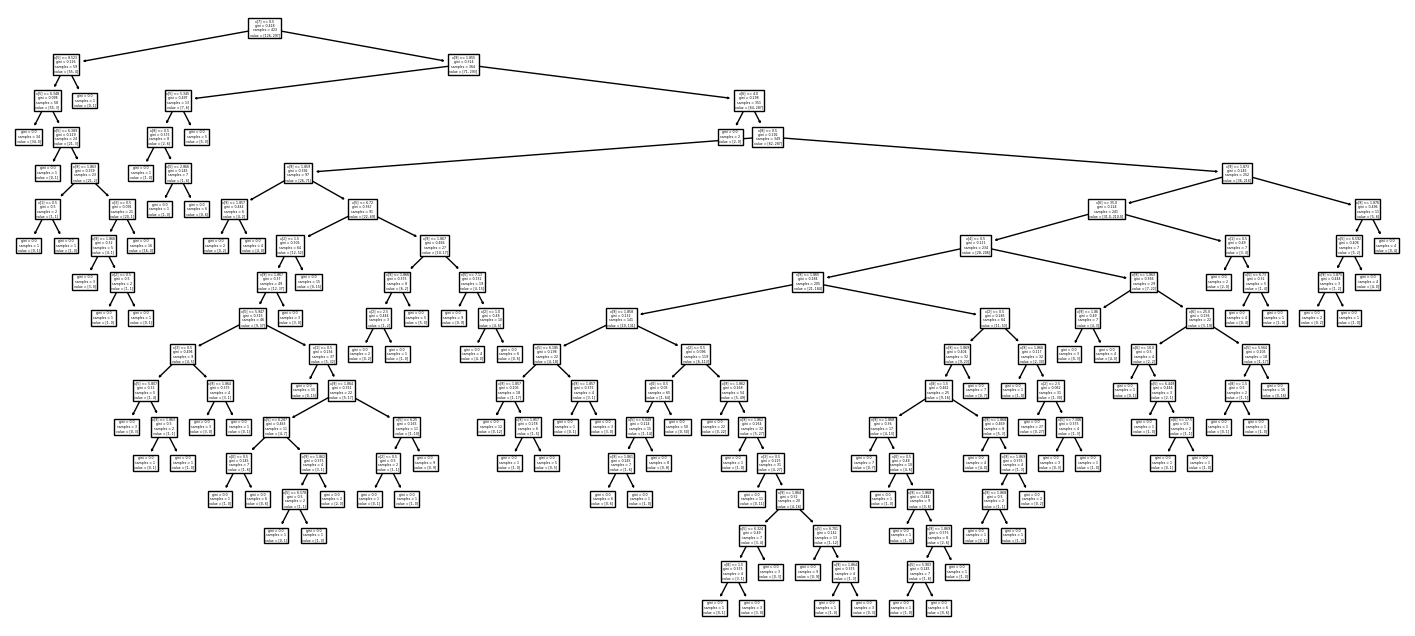

In [89]:
#Default decision tree
model = DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [95]:
# Import necessary libraries for hyperparameter tuning and model building
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeClassifier with a fixed random state for reproducibility
estimator = DecisionTreeClassifier(random_state=True)

# Define the hyperparameter grid to search:
# "criterion" parameter defines the function to measure the quality of a split (either 'gini' or 'entropy')
# "max_depth" sets the maximum depth of the tree, ranging from 1 to 15 in this case
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 16))
}

# Set up the GridSearchCV to perform hyperparameter tuning
# Pass the estimator (Decision Tree), param_grid (possible parameter values),
# scoring metric ("accuracy" here), and cross-validation (cv=5) for evaluation
dt_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

# Fit the model on the training data (x_train, y_train) to find the best combination of parameters
dt_grid.fit(x_train, y_train)

# Retrieve the best estimator (Decision Tree with the optimal parameters found) after grid search
dt = dt_grid.best_estimator_


In [96]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

- after the feature_importance_ , it show only one feature is important , remaing all are wested , best on 1 feature we have to classify the loan is eligible or not.
that is credit_history

In [94]:
#Important Features
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                       index = x.columns,
                       columns = ["Importance"])

important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

#### Creatig Decision Tree Model with important parameters and important features.

In [99]:
# Selecting train and test data
x_train_dt = x_train[important_features_dt]
x_test_dt = x_test[important_features_dt]

# Modelling
dt.fit(x_train_dt, y_train)  # Fit the model on training data and labels

# Evaluation on test data
ypred_test = dt.predict(x_test_dt)   # Predict on test data
ypred_train = dt.predict(x_train_dt) # Predict on training data

# Printing evaluation metrics
print("Train Accuracy:", accuracy_score(y_train, ypred_train))  # Accuracy on training data
print("CV Score:", cross_val_score(dt, x_train_dt, y_train, cv=5, scoring="accuracy").mean())  # Cross-validation score
print("Test Accuracy:", accuracy_score(y_test, ypred_test))  # Accuracy on test data


Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


# 5:- Random Forest Classifier

- HPT
- Identify importatn features
- Modelling
- Evaluation

In [100]:
#Hyper parameter tunning
estimator = RandomForestClassifier(random_state=True)
param_grid ={'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv = 5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_

In [127]:
rf

RandomForestClassifier(n_estimators=21, random_state=True)

In [101]:
#Important Features
# Create a DataFrame to hold feature importance values from the random forest model
# "rf.feature_importances_" gives the importance score of each feature used by the random forest model
feats_ab = pd.DataFrame(
    data=rf.feature_importances_,     # Data: feature importance values from the random forest model
    index=x.columns,                  # Index: column names from the original feature set 'x'
    columns=["Importance"]            # Column name for the DataFrame
)

# Filter out features with an importance score greater than 0
# We are interested in selecting only those features that contribute to the model
important_features_rf = feats_ab[feats_ab["Importance"] > 0].index.tolist()

# "important_features_rf" now contains a list of feature names that have some importance 
# (importance > 0) according to the random forest model. These features are considered important for predictions.


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [121]:
feats_ab

,Importance
Gender,0.023310
Married,0.025712
Dependents,0.053140
Education,0.026781
Self_Employed,0.019456
LoanAmount,0.193924
Loan_Amount_Term,0.054883
Credit_History,0.288456
Property_Area,0.052258
Income,0.262079


In [104]:
#Best modle using the best hyper parameter and important featurese
x_train_rf = x_train[important_features_rf]
x_test_rf = x_test[important_features_rf]

#Modelling
rf.fit(x_train_rf,y_train)

#Evaluation
ypred_train =rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV score :", cross_val_score(rf, x_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))
      

Train Accuracy : 0.9952718676122931
CV score : 0.8203641456582634
Test Accuracy : 0.7735849056603774


# ---- Again the the difference between the Train accuracy and test accuracy is 20% so we can not consider the Random forest classifier.

# 6:- AdaBoost Classifier

In [120]:
# Import necessary libraries
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV

# Initialize the model
estimator = AdaBoostClassifier(random_state=0)

# Define the hyperparameter grid
param_grid = {"n_estimators": list(range(1, 51))}  # Correct parameter name and range

# Setup GridSearchCV
ab_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit the model
ab_grid.fit(x_train, y_train)

# Get the best estimator
ab = ab_grid.best_estimator_

# Print the best parameters found
print("Best parameters for AdaBoost:", ab_grid.best_params_)


Best parameters for AdaBoost: {'n_estimators': 3}


In [129]:
#Important Features
feats_ab =pd.DataFrame(
            data = ab.feature_importances_,
            index=x.columns,
            columns=["Importance"])

important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [128]:
feats_ab

,Importance
Gender,0.023310
Married,0.025712
Dependents,0.053140
Education,0.026781
Self_Employed,0.019456
LoanAmount,0.193924
Loan_Amount_Term,0.054883
Credit_History,0.288456
Property_Area,0.052258
Income,0.262079


In [110]:
#Now build the AdaBoostClassifier model with best hyperparameter and important featues

x_train_ab = x_train[important_features_ab] #Training data with important feature
x_test_ab = x_test[important_features_ab] #Testing data with important features

#Modelling
ab.fit(x_train_ab,y_train)

#Evaluation
ypred_train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

print("Train Accuracy :-", accuracy_score(y_train,ypred_train))
print(" CV Score :-", cross_val_score(ab, x_train_ab, y_train, cv = 5, scoring="accuracy").mean())
print("Test Accuracy :-", accuracy_score(y_test,ypred_test))

Train Accuracy :- 0.83451536643026
 CV Score :- 0.8322408963585435
Test Accuracy :- 0.7641509433962265


# ---- Again the the difference between the Train accuracy and test accuracy is 9% so we can not consider the  AdaBoost Classifier.

 # 7:- Gradient Boost Classifier

In [119]:
#Hyperparameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the model
estimator = GradientBoostingClassifier(random_state=True)

#defining the hyper parameter grid
param_grid = {"n_estimators" : list(range(1,10)),
                "learning_rate": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

#Setup gridSearchCV
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
gb_grid.fit(x_train, y_train)

gb = gb_grid.best_estimator_

# Print the best parameters found
print("Best parameters for GB:", gb_grid.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.6, 'n_estimators': 7}


In [115]:
#Important Features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                       index=x.columns,
                       columns =['Importance'])

important_features_gb = feats_gb[feats_gb['Importance']>0].index.tolist()
important_features_gb

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [117]:
feats_gb

,Importance
Gender,0.000122
Married,0.001401
Dependents,0.000000
Education,0.000000
Self_Employed,0.012139
LoanAmount,0.153615
Loan_Amount_Term,0.057106
Credit_History,0.617203
Property_Area,0.056077
Income,0.102338


In [116]:
#Now build the gradient boost classifier with best Hyper parameter and Important features

x_train_gb = x_train[important_features_gb] #Training data with importatn features
x_test_gb = x_test[important_features_gb] #Testing data with important features

#modelling
gb.fit(x_train_gb, y_train)

#Evaluation
ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)


print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score : ", cross_val_score(gb, x_train_gb, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test,ypred_test))



Train Accuracy : 0.8747044917257684
CV Score :  0.8228011204481793
Test Accuracy :  0.7358490566037735


# ---- Again the the difference between the Train accuracy and test accuracy is 13% so we can not consider the Gradient Boost Classifier.

# 8:- XGBoost Classifier


In [123]:
#Hyperparameter Tunnig
# Import necessary libraries
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# Initialize the model
estimator = XGBClassifier(random_state=0)

# Define the hyperparameter grid for XGBoost
param_grid = {
    "n_estimators": [10, 20, 40, 100],         # Number of boosting rounds
    "gamma": [0., 0.15, 3.0, 0.5,1],     # Minimum loss reduct
    "max_depth": [3, 4, 5]}                  # Maximum tree depth
   

# Setup GridSearchCV with the estimator and parameter grid
xgb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit the model with the training data
xgb_grid.fit(x_train, y_train)

# Get the best estimator (model with best parameters)
xgb = xgb_grid.best_estimator_

# Print the best parameters found
print("Best parameters for XGBoost:", xgb_grid.best_params_)


Best parameters for XGBoost: {'gamma': 0.5, 'max_depth': 4, 'n_estimators': 10}


In [124]:
#Important Features
#Important Features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                       index=x.columns,
                       columns =['Importance'])

important_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [125]:
feats_xgb

,Importance
Gender,0.000000
Married,0.000000
Dependents,0.079282
Education,0.000000
Self_Employed,0.085019
LoanAmount,0.046099
Loan_Amount_Term,0.055976
Credit_History,0.603844
Property_Area,0.063584
Income,0.066195


In [126]:
#Now build the gradient boost classifier with best Hyper parameter and Important features

x_train_xgb = x_train[important_features_xgb] #Training data with importatn features
x_test_xgb = x_test[important_features_xgb] #Testing data with important features

#modelling
xgb.fit(x_train_xgb, y_train)

#Evaluation
ypred_train = xgb.predict(x_train_xgb)
ypred_test = xgb.predict(x_test_xgb)


print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("CV Score : ", cross_val_score(xgb, x_train_xgb, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test,ypred_test))



Train Accuracy : 0.8557919621749409
CV Score :  0.8298599439775911
Test Accuracy :  0.7735849056603774


# ---- Again the the difference between the Train accuracy and test accuracy is 8% so we can not consider the XGBoost Classifier.

### If you want to work on` the recall and precision then we have to check the classification report

In [ ]:
### Now we have the only the Logistic Regression, KNN, SVM, DT are left so we have to choose from it.

Here is the table you requested:

| ML Algorithm | Train Accuracy | CV Score | Test Accuracy |
|--------------|----------------|----------|---------------|
| LR           | 82%            | 82%      | 78%           |
| KNN          | 77%            | 74%      | 74%           |
| SVM          | 82%            | 82%      | 78%           |
| DT           | 82%            | 82%      | 78%           |
| RF           | 99%            | 82%      | 77%           |
| AB           | 83%            | 83%      | 76%           |
| GB           | 87%            | 82%      | 73%           |
| XGB          | 85%            | 82%      | 77%           |

Here is the updated table with the last four models removed and a comment explaining the reason:

| ML Algorithm | Train Accuracy | CV Score | Test Accuracy |
|--------------|----------------|----------|---------------|
| LR           | 82%            | 82%      | 78%           |
| KNN          | 77%            | 74%      | 74%           |
| SVM          | 82%            | 82%      | 78%           |
| DT           | 82%            | 82%      | 78%           |

**Comment**: Models like Random Forest (RF), AdaBoost (AB), Gradient Boosting (GB), and XGBoost (XGB) were excluded due to a larger gap between training and test accuracy, indicating potential overfitting. These models performed significantly better on the training data compared to the test data, which suggests they may have learned the noise or patterns specific to the training set.

Here is the updated table with KNN removed, along with an explanation for why it was excluded:

| ML Algorithm | Train Accuracy | CV Score | Test Accuracy |
|--------------|----------------|----------|---------------|
| LR           | 82%            | 82%      | 78%           |
| SVM          | 82%            | 82%      | 78%           |
| DT           | 82%            | 82%      | 78%           |

**Comment**: KNN was excluded due to its lower cross-validation (CV) score (74%) compared to the others, indicating that it did not generalize as well. The focus was to compare models with the highest CV scores, and KNN's performance did not match up in this aspect. Cross-validation is essential to assess the robustness of the model, and KNN had a less stable performance across different folds, suggesting potential issues with overfitting or underfitting.

Here’s the updated table considering Decision Tree (DT) as the best model based on its overall performance and computational efficiency, as Decision Tree is generally faster than SVM and Logistic Regression:

| ML Algorithm | Train Accuracy | CV Score | Test Accuracy |
|--------------|----------------|----------|---------------|
| DT           | 82%            | 82%      | 78%           |

**Comment**: Decision Tree (DT) is considered the best model here, as it not only provides solid performance with an accuracy score of 82% across train, CV, and test but also tends to be faster in terms of training and prediction time compared to Logistic Regression (LR) and Support Vector Machine (SVM). It offers a good balance between accuracy and computational efficiency, making it ideal when processing time is a consideration.

# Save the best Model

In [131]:
from joblib import dump #save the model 

dump(dt,'lean.joblib')

['lean.joblib']

## Predict on New data

In [133]:
input_data= {"Loan_ID":"LP002991",
            "Gender":"Male",
            "Married":"No",
            "Dependents":1,
            "Education":"Graduate",
            "Self_Employed":"yes",
            "ApplicantIncome":1000,
            "CoapplicantIncome":0,
            
            "LoanAmount":100,
            "Loan_Amount_Term":240,
            "Credit_History":"bad",
            "Property_Area": "Urban"}

In [145]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


### Apply Data Preprocessing on Unknown Data

In [146]:
# Drop the 'Loan_ID' column
data.drop(columns=["Loan_ID"], inplace=True)

# Create a new column 'Income' as the sum of 'ApplicantIncome' and 'CoapplicantIncome'
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Drop the 'ApplicantIncome' and 'CoapplicantIncome' columns after creating 'Income'
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

# Fill missing values in the 'Dependents' column with 0
data['Dependents'] = data['Dependents'].fillna(0)

# Fill missing values in categorical columns with the mode (most frequent value)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Drop rows where any of the specified columns have missing values
data.dropna(subset=["Income", "LoanAmount", "Loan_Amount_Term", 'Credit_History'], inplace=True)

# Convert 'Dependents' to integer
data['Dependents'] = data['Dependents'].astype('int')

# Convert 'Loan_Amount_Term' to integer
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

# Replace categorical values with numerical values
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].replace({'yes': 1, 'No': 0})  # Corrected 'yes' to 'Yes'
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Credit_History'] = data['Credit_History'].replace({'good': 1, 'bad': 0})

# Normalize 'Loan_Amount_Term' by dividing by 12 (to convert months to years)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12

# Assign the cleaned data to a new variable
x_new = data


In [147]:
x_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,1,1,1,100,20.0,0,2,1000


In [148]:
# Select Important features of your best model
x_new = x_new[['Credit_History']]

#Apply & predict using your best model
dt.predict(x_new)

array([0], dtype=int64)

In [ ]:
NO, due to he has not the good credit history.